In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop("CustomerID",axis = 1, inplace = True)

In [7]:
df.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [8]:
df.Gender.replace("Male",0,inplace =True )

In [9]:
df.Gender.replace("Female",1,inplace =True ) #  df.Gender.replace(["Male", "Female"], [0,1], inplace = True)

In [10]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


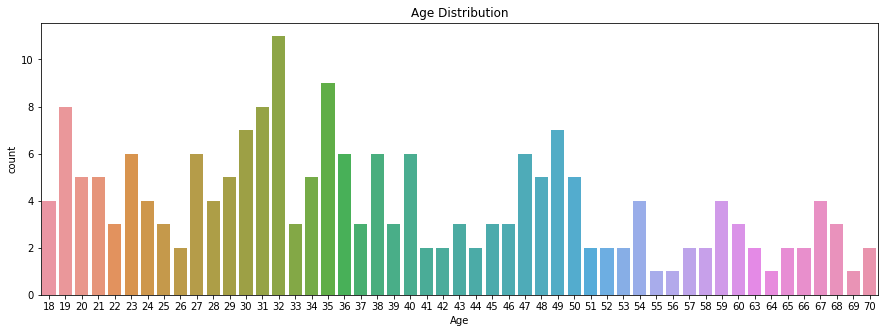

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

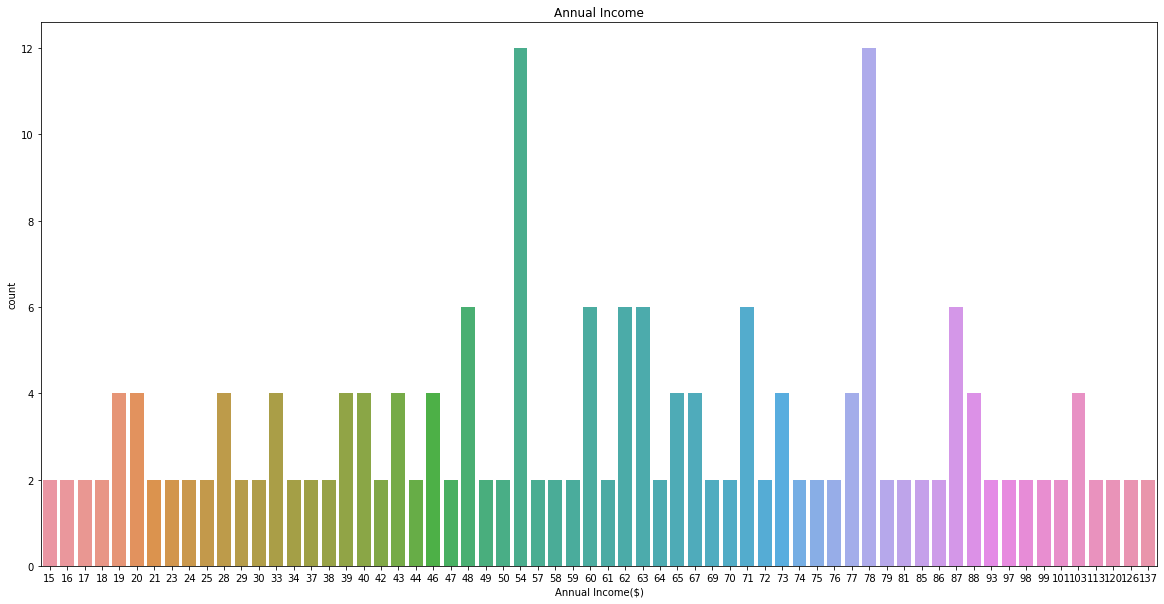

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

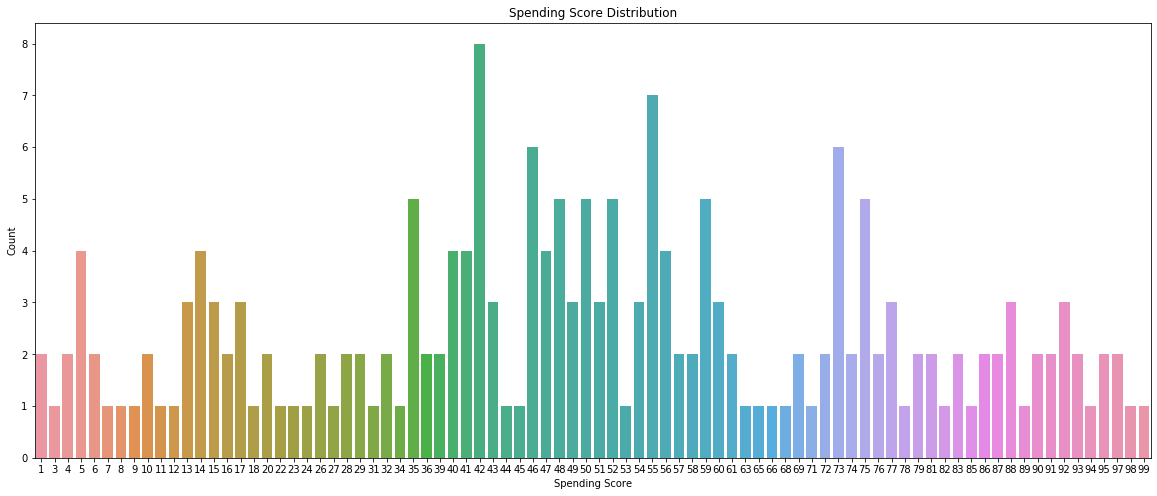

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(df['Spending_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show()

Text(0, 0.5, 'Count')

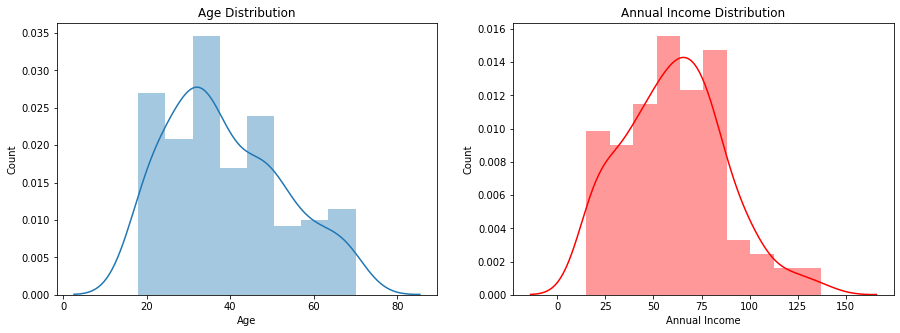

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

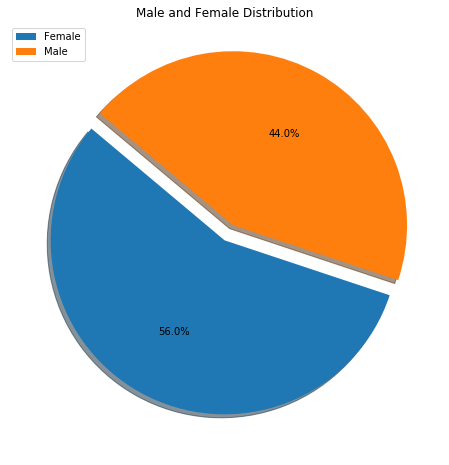

In [15]:
plt.figure(figsize=(8,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

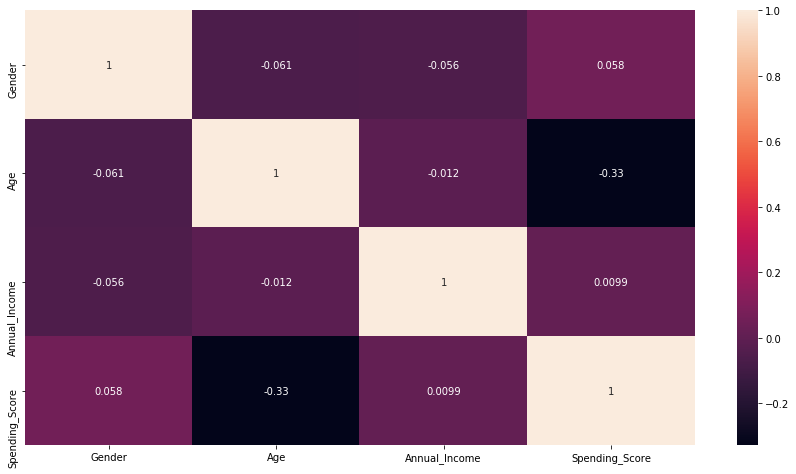

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

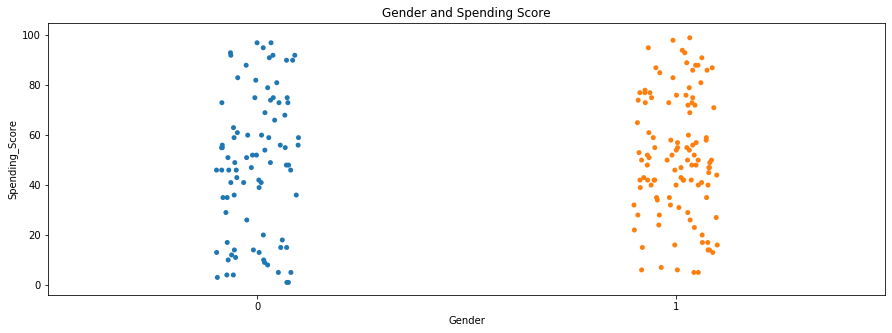

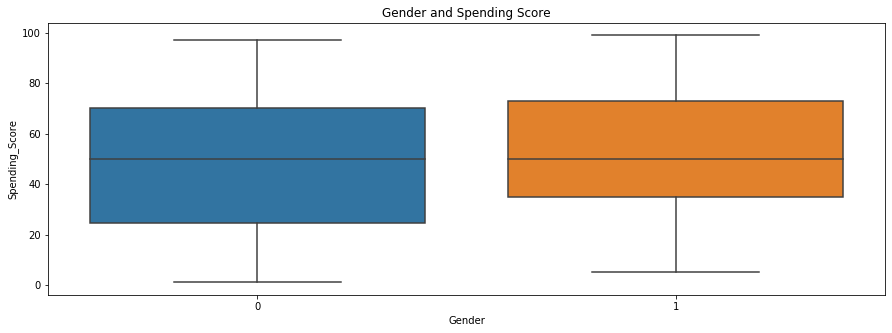

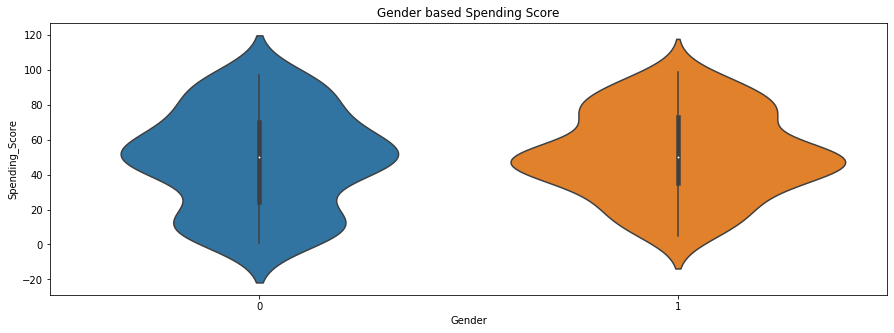

In [17]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Spending_Score'])
plt.title('Gender based Spending Score')
plt.show()

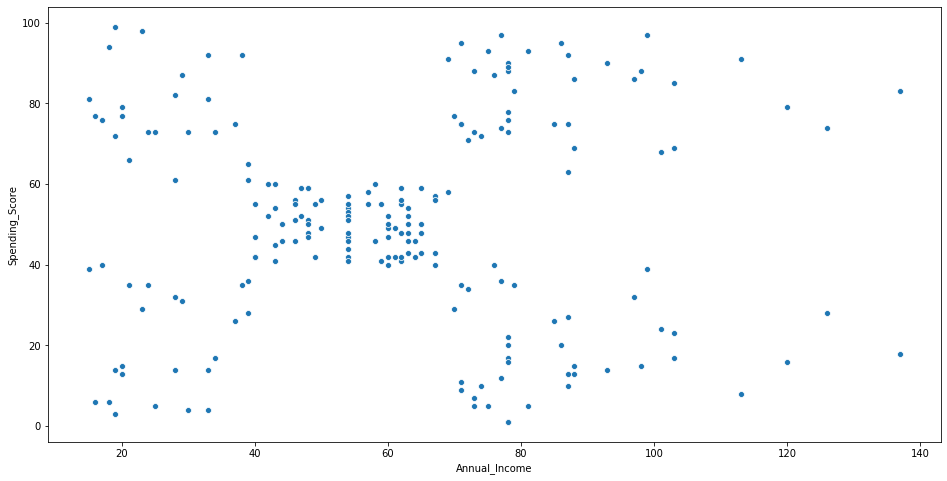

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax)
plt.show()

In [19]:
from pyclustertend import hopkins
hopkins(df,df.shape[0])

0.31635056679263507

In [20]:
x1 = pd.DataFrame(df.loc[:,["Age","Spending_Score"]].values, columns = ["Age","Spending_Score"])
x1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [21]:
hopkins(x1,x1.shape[0])

0.28421448652407927

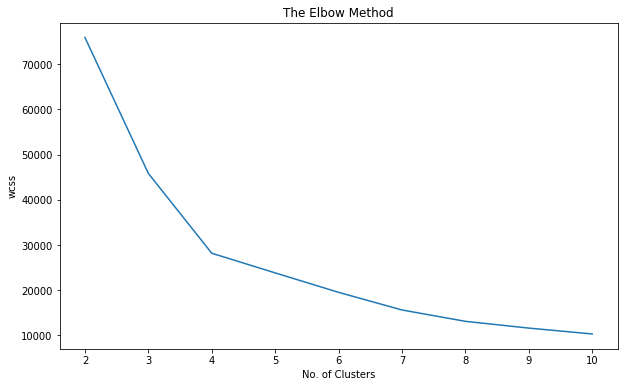

In [22]:
from sklearn.cluster import KMeans
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 4)
y_means=kmeans.fit_predict(x1)

In [25]:
x1["cluster"] = y_means

In [26]:
x1

,Age,Spending_Score,cluster
0,19,39,2
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,2
...,...,...,...
195,35,79,0
196,45,28,3
197,32,74,0
198,32,18,3


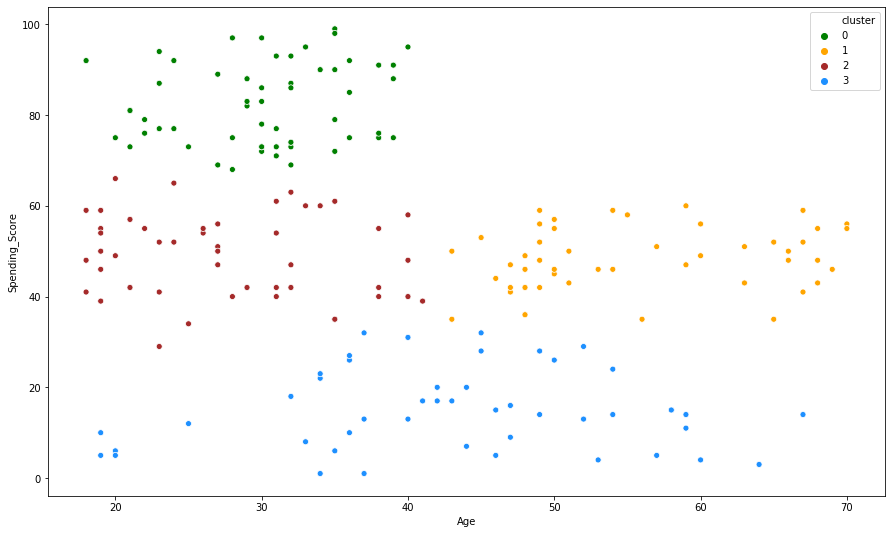

In [27]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

In [28]:
x2 = pd.DataFrame(df.loc[:,['Annual_Income','Spending_Score']].values,columns=['Annual_Income','Spending_Score'])
x2

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [29]:
from pyclustertend import hopkins
hopkins(x2,x2.shape[0])

0.306040641504734

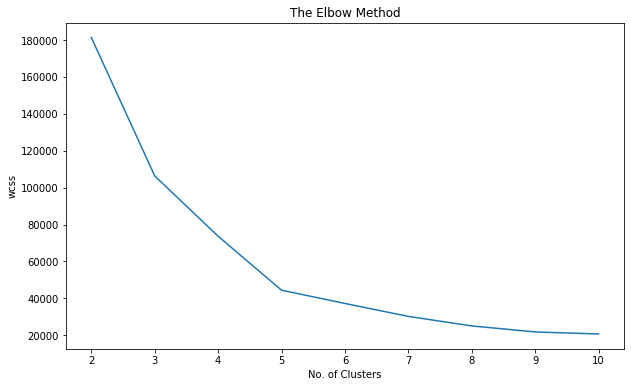

In [30]:
from sklearn.cluster import KMeans
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeansmodel = KMeans(n_clusters=5)
kmeansmodel.fit(x2)

KMeans(n_clusters=5)

In [33]:
x2["cluster"]=kmeans.labels_
x2

,Annual_Income,Spending_Score,cluster
0,15,39,1
1,15,81,4
2,16,6,7
3,16,77,4
4,17,40,1
...,...,...,...
195,120,79,8
196,126,28,9
197,126,74,8
198,137,18,9


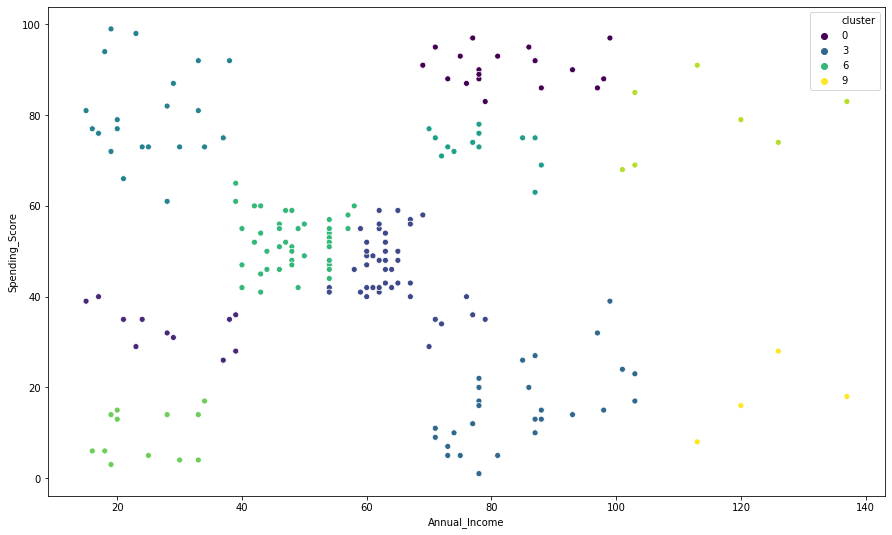

In [34]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2, palette = "viridis")

In [35]:
from scipy.cluster.hierarchy import linkage

In [36]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

In [37]:
from scipy.cluster.hierarchy import dendrogram

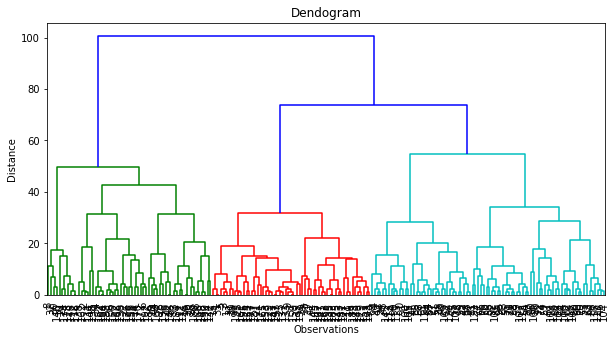

In [38]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

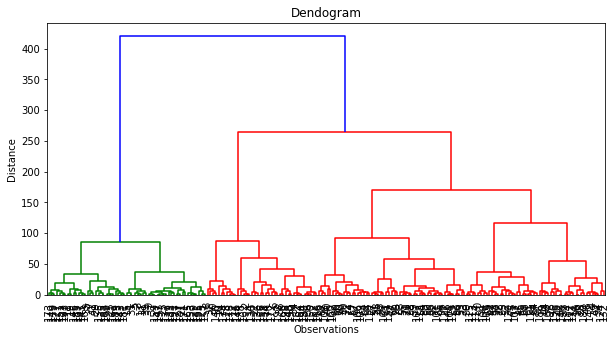

In [39]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

In [40]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

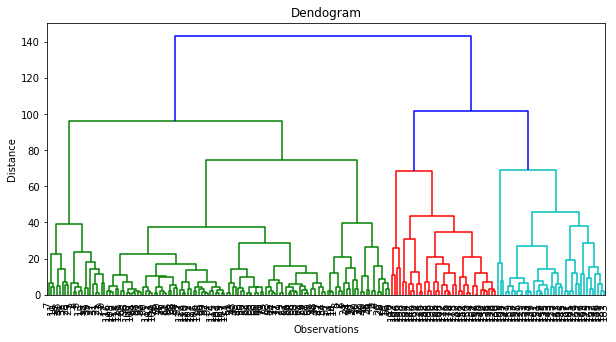

In [41]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

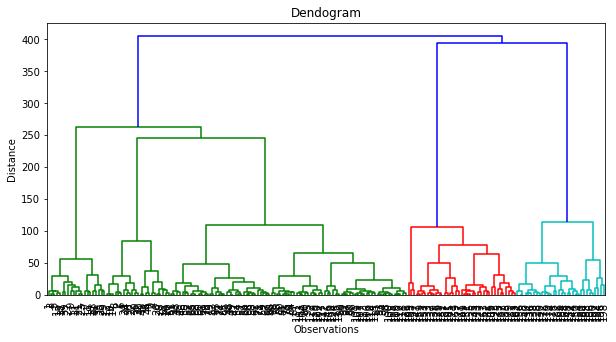

In [42]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [44]:
x1["cluster2"]=y_agg
x1

,Age,Spending_Score,cluster,cluster2
0,19,39,2,0
1,21,81,0,3
2,20,6,3,2
3,23,77,0,3
4,31,40,2,0
...,...,...,...,...
195,35,79,0,3
196,45,28,3,0
197,32,74,0,3
198,32,18,3,2


In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg2 = cluster.fit_predict(x2)

In [46]:
x2["cluster2"]=y_agg2
x2

,Annual_Income,Spending_Score,cluster,cluster2
0,15,39,1,0
1,15,81,4,3
2,16,6,7,0
3,16,77,4,3
4,17,40,1,0
...,...,...,...,...
195,120,79,8,2
196,126,28,9,1
197,126,74,8,2
198,137,18,9,1


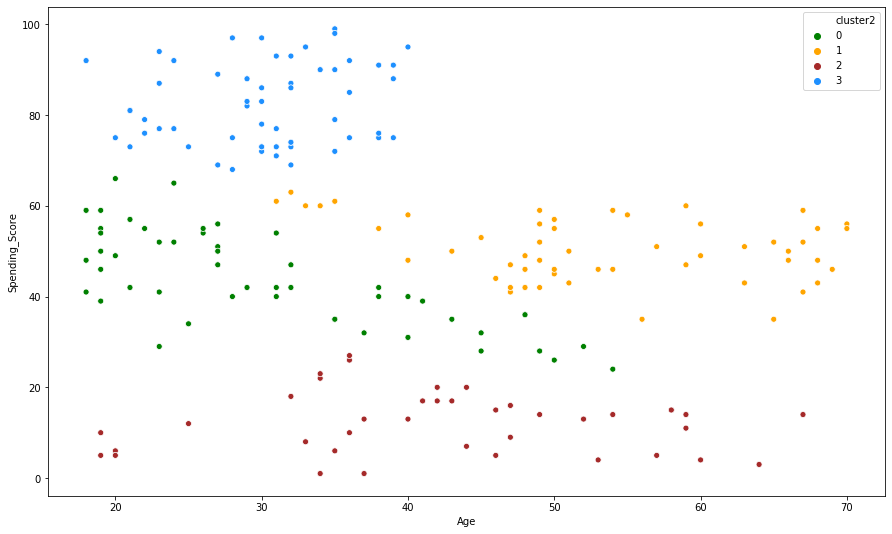

In [47]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

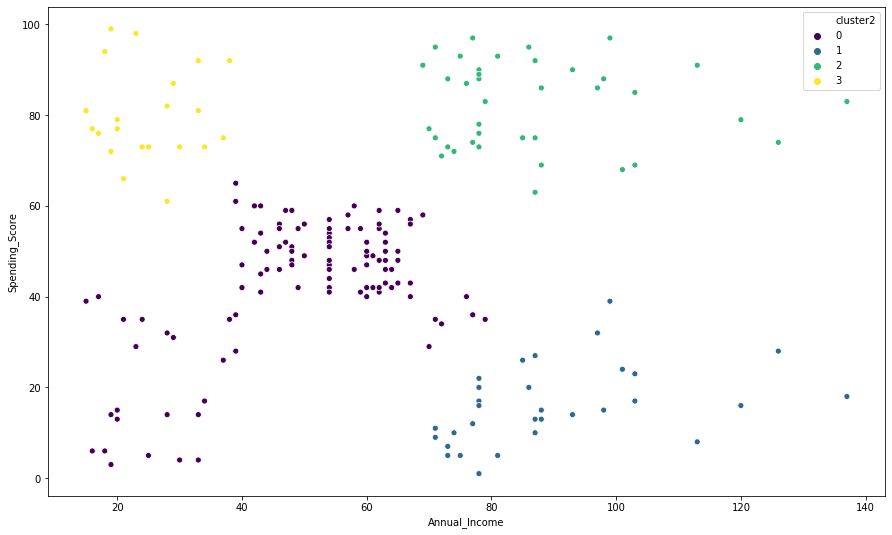

In [48]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster2', data=x2, palette="viridis")

In [49]:
df["cluster"]=y_agg2
df

,Gender,Age,Annual_Income,Spending_Score,cluster
0,0,19,15,39,0
1,0,21,15,81,3
2,1,20,16,6,0
3,1,23,16,77,3
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,1
197,0,32,126,74,2
198,0,32,137,18,1


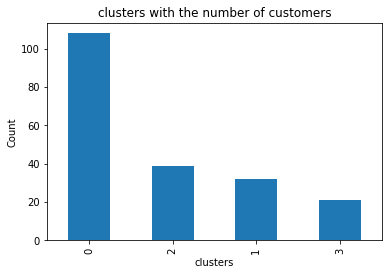

In [50]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.cluster.value_counts().plot(kind='bar')

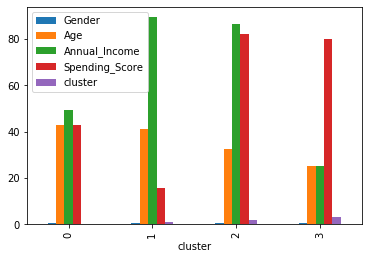

In [51]:
df.groupby(df.cluster).mean().plot(kind='bar')
plt.show()

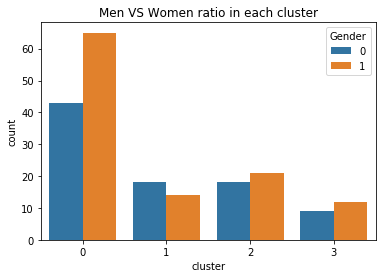

In [52]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
sns.countplot(x=df.cluster, hue=df.Gender)
plt.show()